<a href="https://colab.research.google.com/github/iirthw/Vision_sandbox/blob/main/mnist/validate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [50]:
from tensorflow.keras.datasets import mnist
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [51]:
data = pickle.load(open('data0.pkl','rb'))
print(data[0].shape)
print(data[1].shape)

data_test = pickle.load(open('data.pkl','rb'))
print(data_train[0].shape)
print(data_train[1].shape)

(1250, 28, 28)
(1250, 1)
(756, 28, 28)
(756, 1)


In [52]:
x_train = data[0]
x_train = x_train[..., np.newaxis]
y_train = data[1]
y_train = tf.keras.utils.to_categorical(y_train, 10)

y_train0 = tf.keras.utils.to_categorical(y_train0, 10)
y_test0 = tf.keras.utils.to_categorical(y_test0, 10)
x_test0 = x_test0[..., np.newaxis]

x_test = data_test[0]
x_test = x_test[..., np.newaxis]
y_test = data_test[1]
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(x_train.shape)
print(y_train.shape)
print(x_test0.shape)
print(y_test0.shape)

PIXEL_DEPTH = 255
x_train = (x_train - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
x_test = (x_test - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
x_train0 = (x_train0 - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
x_test0 = (x_test0 - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH

(1250, 28, 28, 1)
(1250, 10)
(10000, 28, 28, 1)
(10000, 10)


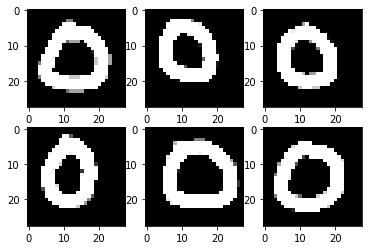

In [60]:
fig = plt.figure()
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[0, 2])
ax6 = fig.add_subplot(gs[1, 2])
ax1.imshow(x_test[0, :, :].squeeze(), cmap='gist_gray')
ax2.imshow(x_test[1, :, :].squeeze(), cmap='gist_gray')
ax3.imshow(x_test[2, :, :].squeeze(), cmap='gist_gray')
ax4.imshow(x_test[3, :, :].squeeze(), cmap='gist_gray')
ax5.imshow(x_test[4, :, :].squeeze(), cmap='gist_gray')
ax6.imshow(x_test[5, :, :].squeeze(), cmap='gist_gray')

In [66]:
model = tf.keras.models.load_model('mnist_cnn_full_0.9.h5')
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d_14 (Avera  (None, 13, 13, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_15 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_19 (Flatten)        (None, 400)               0         
                                                                 
 dense_45 (Dense)            (None, 120)             

In [59]:
tf.config.run_functions_eagerly(True)
print(x_train.shape)
print(x_test0.shape)
print(y_test0.shape)
model.fit(x_train, y_train, 
          batch_size=128,
          epochs=25, verbose=1, validation_data=(x_test0, y_test0))

(1250, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 10)
Epoch 1/25
 1/10 [==>...........................] - ETA: 0s - loss: 0.1182 - accuracy: 0.9688

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


10/10 [==============================] - 3s 361ms/step - loss: 0.0953 - accuracy: 0.9736 - val_loss: 5.1036 - val_accuracy: 0.3119
Epoch 2/25
10/10 [==============================] - 3s 346ms/step - loss: 0.0787 - accuracy: 0.9808 - val_loss: 4.8290 - val_accuracy: 0.3466
Epoch 3/25
10/10 [==============================] - 3s 355ms/step - loss: 0.0707 - accuracy: 0.9816 - val_loss: 4.6067 - val_accuracy: 0.3422
Epoch 4/25
10/10 [==============================] - 3s 339ms/step - loss: 0.0599 - accuracy: 0.9848 - val_loss: 5.2305 - val_accuracy: 0.3499
Epoch 5/25
10/10 [==============================] - 3s 355ms/step - loss: 0.0577 - accuracy: 0.9864 - val_loss: 5.5889 - val_accuracy: 0.3067
Epoch 6/25
10/10 [==============================] - 3s 349ms/step - loss: 0.0578 - accuracy: 0.9832 - val_loss: 5.8116 - val_accuracy: 0.3035
Epoch 7/25
10/10 [==============================] - 3s 330ms/step - loss: 0.0479 - accuracy: 0.9856 - val_loss: 5.6358 - val_accuracy: 0.3197
Epoch 8/25
10/10 

In [68]:
for i in range(30):
  x = x_test[i,...]
  y = y_test[i,...]
  pred = np.argmax(model.predict(X))
  label = np.argmax(y)
  res = '✓' if label == pred else 'X'
  print(str(label) + ' - ' + str(pred) + ' (' + res + ')')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


0 - 5 (X)
0 - 5 (X)
0 - 5 (X)
0 - 5 (X)
0 - 5 (X)
0 - 5 (X)
0 - 5 (X)
0 - 5 (X)
0 - 5 (X)
0 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
1 - 5 (X)
2 - 5 (X)
2 - 5 (X)


In [ ]:
for i in range(Y_test.shape[0]):
  X = X_test[i,...]
  X = X[np.newaxis,...]
  Y = Y_test[i,...]
  Y = Y[np.newaxis,...]
  res = model.evaluate(X, Y)
  print(res)